# FAB - Project

## Baixando bibliotecas

### Baixando Numpy

In [0]:
!pip install numpy

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-628e2a52-148e-45c5-8323-0699398718dd/bin/python -m pip install --upgrade pip' command.


### Instalando PySpark

In [0]:
!pip install pyspark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-628e2a52-148e-45c5-8323-0699398718dd/bin/python -m pip install --upgrade pip' command.


## Baixando Folium

In [0]:
!pip install folium

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-628e2a52-148e-45c5-8323-0699398718dd/bin/python -m pip install --upgrade pip' command.


## Importando bibliotecas

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, month, to_date
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F


spark = SparkSession.builder.master("local[*]").appName("FAB").getOrCreate()

## Baixando os arquivos

In [0]:
fator_contribuinte_df = spark.read.option("delimiter", ";").csv("dbfs:/FileStore/shared_uploads/mjm.maer.9@gmail.com/fator_contribuinte.csv", header=True, inferSchema=True)

aeronave_df = spark.read.option("delimiter", ";").csv("dbfs:/FileStore/shared_uploads/mjm.maer.9@gmail.com/aeronave.csv", header=True, inferSchema=True)

ocorrencia_df = spark.read.option("delimiter", ";").csv("dbfs:/FileStore/shared_uploads/mjm.maer.9@gmail.com/ocorrencia.csv", header=True, inferSchema=True)

ocorrencia_tipo_df = spark.read.option("delimiter", ";").csv("dbfs:/FileStore/shared_uploads/mjm.maer.9@gmail.com/ocorrencia_tipo.csv", header=True, inferSchema=True)

recomendacao_df = spark.read.option("delimiter", ";").csv("dbfs:/FileStore/shared_uploads/mjm.maer.9@gmail.com/recomendacao.csv", header=True, inferSchema=True)




## Visualizando Dataframes

### Visualizando Fator Contribuiente

In [0]:
fator_contribuinte_df.show(10)

+------------------+--------------------+--------------------+--------------------+-----------------+
|codigo_ocorrencia3|          fator_nome|       fator_aspecto| fator_condicionante|       fator_area|
+------------------+--------------------+--------------------+--------------------+-----------------+
|             84399|CONDIÇÕES METEORO...|ELEMENTOS RELACIO...|                 ***|FATOR OPERACIONAL|
|             84399|           PERCEPÇÃO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|             84399|  PROCESSO DECISÓRIO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|             84201|APLICAÇÃO DE COMA...|DESEMPENHO DO SER...|OPERAÇÃO DA AERONAVE|FATOR OPERACIONAL|
|             84201|INFRAESTRUTURA AE...|INFRAESTRUTURA AE...|                 ***|FATOR OPERACIONAL|
|             84201|           PERCEPÇÃO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|             84201|POUCA EXPERIÊNCIA...|DESEMPENHO DO SER...|OPERAÇÃO DA AERONAVE

### Visualizando Aeronave

In [0]:
aeronave_df.show(10)

+------------------+------------------+---------------------------+---------------------+-------------------+---------------+------------------+-------------------+-------------------------+------------+----------------------+-----------------+-----------------------+------------------------+----------------------+---------------------------+--------------------------+--------------------+--------------------+----------------------+----------------------+-------------------+--------------------------+
|codigo_ocorrencia2|aeronave_matricula|aeronave_operador_categoria|aeronave_tipo_veiculo|aeronave_fabricante|aeronave_modelo|aeronave_tipo_icao|aeronave_motor_tipo|aeronave_motor_quantidade|aeronave_pmd|aeronave_pmd_categoria|aeronave_assentos|aeronave_ano_fabricacao|aeronave_pais_fabricante|aeronave_pais_registro|aeronave_registro_categoria|aeronave_registro_segmento| aeronave_voo_origem|aeronave_voo_destino|aeronave_fase_operacao|aeronave_tipo_operacao|aeronave_nivel_dano|aeronave_fatal

### Visualisando Ocorrencia

In [0]:
ocorrencia_df.show(10)

+-----------------+------------------+------------------+------------------+------------------+------------------------+-------------------+--------------------+--------------------+-------------+---------------+--------------------+--------------+---------------+------------------------------+-------------------+---------------------------+------------------------------+-------------------------+-------------------+--------------------------+----------------------+
|codigo_ocorrencia|codigo_ocorrencia1|codigo_ocorrencia2|codigo_ocorrencia3|codigo_ocorrencia4|ocorrencia_classificacao|ocorrencia_latitude|ocorrencia_longitude|   ocorrencia_cidade|ocorrencia_uf|ocorrencia_pais|ocorrencia_aerodromo|ocorrencia_dia|ocorrencia_hora|investigacao_aeronave_liberada|investigacao_status|divulgacao_relatorio_numero|divulgacao_relatorio_publicado|divulgacao_dia_publicacao|total_recomendacoes|total_aeronaves_envolvidas|ocorrencia_saida_pista|
+-----------------+------------------+------------------+-

### Visualisando Ocorrencia Tipo

In [0]:
ocorrencia_tipo_df.show(10)

+------------------+--------------------+-------------------------+-------------------+
|codigo_ocorrencia1|     ocorrencia_tipo|ocorrencia_tipo_categoria|taxonomia_tipo_icao|
+------------------+--------------------+-------------------------+-------------------+
|             86683|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-PP|
|             86682|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|             86678|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|             86677|     COLISÃO COM AVE|          COLISÃO COM AVE|               BIRD|
|             86676|   EXCURSÃO DE PISTA|        EXCURSÃO DE PISTA|                 RE|
|             86676|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|             86675|     COLISÃO NO SOLO|          COLISÃO NO SOLO|               GCOL|
|             86672|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|             86671|   EXCURSÃO 

### Visualisando Recomendacao


In [0]:
recomendacao_df.show(10)

+------------------+--------------------+---------------------------+-------------------------------+-------------------------+---------------------+-------------------+-------------------------------+-------------------------+
|codigo_ocorrencia4| recomendacao_numero|recomendacao_dia_assinatura|recomendacao_dia_encaminhamento|recomendacao_dia_feedback|recomendacao_conteudo|recomendacao_status|recomendacao_destinatario_sigla|recomendacao_destinatario|
+------------------+--------------------+---------------------------+-------------------------------+-------------------------+---------------------+-------------------+-------------------------------+-------------------------+
|             83193|A-014/CENIPA/2024...|                 2025-02-17|                     2025-02-19|                     NULL| Divulgar os ensin...|AGUARDANDO RESPOSTA|                           ANAC|     AGÊNCIA NACIONAL ...|
|             83193|A-014/CENIPA/2024...|                 2025-02-17|                   

## Transformando os dados

### Renomeando colunas de Ocorrencia 

In [0]:
ocorrencia_df_rename_ocorrencia_tipo = ocorrencia_df.withColumnRenamed("codigo_ocorrencia1", "codigo_ocorrencia_tipo")

ocorrencia_df_rename_aeronave = ocorrencia_df_rename_ocorrencia_tipo.withColumnRenamed("codigo_ocorrencia2", "codigo_aeronave")


ocorrencia_df_rename_fator_contribuinte = ocorrencia_df_rename_aeronave.withColumnRenamed("codigo_ocorrencia3", "codigo_fator_contribuinte")

ocorrencia_df_rename_recomendacao = ocorrencia_df_rename_fator_contribuinte.withColumnRenamed("codigo_ocorrencia4", "codigo_recomendacao")

ocorrencia_df_rename_recomendacao.show(10)

+-----------------+----------------------+---------------+-------------------------+-------------------+------------------------+-------------------+--------------------+--------------------+-------------+---------------+--------------------+--------------+---------------+------------------------------+-------------------+---------------------------+------------------------------+-------------------------+-------------------+--------------------------+----------------------+
|codigo_ocorrencia|codigo_ocorrencia_tipo|codigo_aeronave|codigo_fator_contribuinte|codigo_recomendacao|ocorrencia_classificacao|ocorrencia_latitude|ocorrencia_longitude|   ocorrencia_cidade|ocorrencia_uf|ocorrencia_pais|ocorrencia_aerodromo|ocorrencia_dia|ocorrencia_hora|investigacao_aeronave_liberada|investigacao_status|divulgacao_relatorio_numero|divulgacao_relatorio_publicado|divulgacao_dia_publicacao|total_recomendacoes|total_aeronaves_envolvidas|ocorrencia_saida_pista|
+-----------------+---------------------

### Renomeando colunas de Aeronave

In [0]:
aeronave_df_rename = aeronave_df.withColumnRenamed("codigo_ocorrencia2", "codigo_aeronave")

aeronave_df_rename.show(10)

+---------------+------------------+---------------------------+---------------------+-------------------+---------------+------------------+-------------------+-------------------------+------------+----------------------+-----------------+-----------------------+------------------------+----------------------+---------------------------+--------------------------+--------------------+--------------------+----------------------+----------------------+-------------------+--------------------------+
|codigo_aeronave|aeronave_matricula|aeronave_operador_categoria|aeronave_tipo_veiculo|aeronave_fabricante|aeronave_modelo|aeronave_tipo_icao|aeronave_motor_tipo|aeronave_motor_quantidade|aeronave_pmd|aeronave_pmd_categoria|aeronave_assentos|aeronave_ano_fabricacao|aeronave_pais_fabricante|aeronave_pais_registro|aeronave_registro_categoria|aeronave_registro_segmento| aeronave_voo_origem|aeronave_voo_destino|aeronave_fase_operacao|aeronave_tipo_operacao|aeronave_nivel_dano|aeronave_fatalidades

### Renomeando colunas Fator Contribuinte

In [0]:
fator_contribuinte_df_rename = fator_contribuinte_df.withColumnRenamed("codigo_ocorrencia3", "codigo_fator_contribuinte")
fator_contribuinte_df_rename.show(10)

+-------------------------+--------------------+--------------------+--------------------+-----------------+
|codigo_fator_contribuinte|          fator_nome|       fator_aspecto| fator_condicionante|       fator_area|
+-------------------------+--------------------+--------------------+--------------------+-----------------+
|                    84399|CONDIÇÕES METEORO...|ELEMENTOS RELACIO...|                 ***|FATOR OPERACIONAL|
|                    84399|           PERCEPÇÃO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|                    84399|  PROCESSO DECISÓRIO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|                    84201|APLICAÇÃO DE COMA...|DESEMPENHO DO SER...|OPERAÇÃO DA AERONAVE|FATOR OPERACIONAL|
|                    84201|INFRAESTRUTURA AE...|INFRAESTRUTURA AE...|                 ***|FATOR OPERACIONAL|
|                    84201|           PERCEPÇÃO| ASPECTO PSICOLÓGICO|          INDIVIDUAL|     FATOR HUMANO|
|                  

### Renomeando colunas Ocorrencia Tipo

In [0]:
ocorrencia_tipo_df_rename = ocorrencia_tipo_df.withColumnRenamed("codigo_ocorrencia1", "codigo_ocorrencia_tipo")

ocorrencia_tipo_df_rename.show(10)

+----------------------+--------------------+-------------------------+-------------------+
|codigo_ocorrencia_tipo|     ocorrencia_tipo|ocorrencia_tipo_categoria|taxonomia_tipo_icao|
+----------------------+--------------------+-------------------------+-------------------+
|                 86683|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-PP|
|                 86682|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|                 86678|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|                 86677|     COLISÃO COM AVE|          COLISÃO COM AVE|               BIRD|
|                 86676|   EXCURSÃO DE PISTA|        EXCURSÃO DE PISTA|                 RE|
|                 86676|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|             SCF-NP|
|                 86675|     COLISÃO NO SOLO|          COLISÃO NO SOLO|               GCOL|
|                 86672|FALHA OU MAU FUNC...|     FALHA OU MAU FUNC...|         

### Renomeando Recomendacao

In [0]:
recomendacao_df_rename = recomendacao_df.withColumnRenamed("codigo_ocorrencia4", "codigo_recomendacao")

recomendacao_df_rename.show(10)

+-------------------+--------------------+---------------------------+-------------------------------+-------------------------+---------------------+-------------------+-------------------------------+-------------------------+
|codigo_recomendacao| recomendacao_numero|recomendacao_dia_assinatura|recomendacao_dia_encaminhamento|recomendacao_dia_feedback|recomendacao_conteudo|recomendacao_status|recomendacao_destinatario_sigla|recomendacao_destinatario|
+-------------------+--------------------+---------------------------+-------------------------------+-------------------------+---------------------+-------------------+-------------------------------+-------------------------+
|              83193|A-014/CENIPA/2024...|                 2025-02-17|                     2025-02-19|                     NULL| Divulgar os ensin...|AGUARDANDO RESPOSTA|                           ANAC|     AGÊNCIA NACIONAL ...|
|              83193|A-014/CENIPA/2024...|                 2025-02-17|              

### Verficando os tipos das variaveis nas tabelas

In [0]:
ocorrencia_df_rename_recomendacao.printSchema()

root
 |-- codigo_ocorrencia: integer (nullable = true)
 |-- codigo_ocorrencia_tipo: integer (nullable = true)
 |-- codigo_aeronave: integer (nullable = true)
 |-- codigo_fator_contribuinte: integer (nullable = true)
 |-- codigo_recomendacao: integer (nullable = true)
 |-- ocorrencia_classificacao: string (nullable = true)
 |-- ocorrencia_latitude: string (nullable = true)
 |-- ocorrencia_longitude: string (nullable = true)
 |-- ocorrencia_cidade: string (nullable = true)
 |-- ocorrencia_uf: string (nullable = true)
 |-- ocorrencia_pais: string (nullable = true)
 |-- ocorrencia_aerodromo: string (nullable = true)
 |-- ocorrencia_dia: date (nullable = true)
 |-- ocorrencia_hora: string (nullable = true)
 |-- investigacao_aeronave_liberada: string (nullable = true)
 |-- investigacao_status: string (nullable = true)
 |-- divulgacao_relatorio_numero: string (nullable = true)
 |-- divulgacao_relatorio_publicado: string (nullable = true)
 |-- divulgacao_dia_publicacao: string (nullable = true

In [0]:
aeronave_df_rename.printSchema()

root
 |-- codigo_aeronave: integer (nullable = true)
 |-- aeronave_matricula: string (nullable = true)
 |-- aeronave_operador_categoria: string (nullable = true)
 |-- aeronave_tipo_veiculo: string (nullable = true)
 |-- aeronave_fabricante: string (nullable = true)
 |-- aeronave_modelo: string (nullable = true)
 |-- aeronave_tipo_icao: string (nullable = true)
 |-- aeronave_motor_tipo: string (nullable = true)
 |-- aeronave_motor_quantidade: string (nullable = true)
 |-- aeronave_pmd: integer (nullable = true)
 |-- aeronave_pmd_categoria: integer (nullable = true)
 |-- aeronave_assentos: string (nullable = true)
 |-- aeronave_ano_fabricacao: string (nullable = true)
 |-- aeronave_pais_fabricante: string (nullable = true)
 |-- aeronave_pais_registro: string (nullable = true)
 |-- aeronave_registro_categoria: string (nullable = true)
 |-- aeronave_registro_segmento: string (nullable = true)
 |-- aeronave_voo_origem: string (nullable = true)
 |-- aeronave_voo_destino: string (nullable = t

In [0]:
fator_contribuinte_df_rename.printSchema()

root
 |-- codigo_fator_contribuinte: integer (nullable = true)
 |-- fator_nome: string (nullable = true)
 |-- fator_aspecto: string (nullable = true)
 |-- fator_condicionante: string (nullable = true)
 |-- fator_area: string (nullable = true)



In [0]:
fator_contribuinte_df_rename.printSchema()

root
 |-- codigo_fator_contribuinte: integer (nullable = true)
 |-- fator_nome: string (nullable = true)
 |-- fator_aspecto: string (nullable = true)
 |-- fator_condicionante: string (nullable = true)
 |-- fator_area: string (nullable = true)



In [0]:
ocorrencia_tipo_df_rename.printSchema()

root
 |-- codigo_ocorrencia_tipo: integer (nullable = true)
 |-- ocorrencia_tipo: string (nullable = true)
 |-- ocorrencia_tipo_categoria: string (nullable = true)
 |-- taxonomia_tipo_icao: string (nullable = true)



In [0]:
recomendacao_df_rename.printSchema()

root
 |-- codigo_recomendacao: integer (nullable = true)
 |-- recomendacao_numero: string (nullable = true)
 |-- recomendacao_dia_assinatura: date (nullable = true)
 |-- recomendacao_dia_encaminhamento: date (nullable = true)
 |-- recomendacao_dia_feedback: string (nullable = true)
 |-- recomendacao_conteudo: string (nullable = true)
 |-- recomendacao_status: string (nullable = true)
 |-- recomendacao_destinatario_sigla: string (nullable = true)
 |-- recomendacao_destinatario: string (nullable = true)



### Vendo a variavel `ocorrencia_classificacao`

In [0]:
ocorrencia_df_rename_recomendacao.select("ocorrencia_classificacao").show(10)

+------------------------+
|ocorrencia_classificacao|
+------------------------+
|         INCIDENTE GRAVE|
|               INCIDENTE|
|               INCIDENTE|
|               INCIDENTE|
|                ACIDENTE|
|               INCIDENTE|
|               INCIDENTE|
|         INCIDENTE GRAVE|
|               INCIDENTE|
|               INCIDENTE|
+------------------------+
only showing top 10 rows



In [0]:
ocorrencia_df_rename_recomendacao_tipos = (
    ocorrencia_df_rename_recomendacao
    .select("ocorrencia_classificacao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_df_rename_recomendacao_tipos)


['INCIDENTE', 'INCIDENTE GRAVE', 'ACIDENTE']


### Vendo a variavel `ocorrencia_cidade`

In [0]:
ocorrencia_df_rename_recomendacao.select("ocorrencia_cidade").show(10)

+--------------------+
|   ocorrencia_cidade|
+--------------------+
|           SALGUEIRO|
|            BRASÍLIA|
|               MACAÉ|
|CAMPOS DOS GOYTAC...|
|          ARAGUATINS|
|             GOIÂNIA|
|      RIO DE JANEIRO|
|            CURITIBA|
|               BELÉM|
|       FLORIANÓPOLIS|
+--------------------+
only showing top 10 rows



In [0]:
ocorrencia_df_rename_recomendacao_tipos = (
    ocorrencia_df_rename_recomendacao
    .select("ocorrencia_cidade")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_df_rename_recomendacao_tipos)

['SÃO JOAQUIM DA BARRA', 'CRUZEIRO DO SUL', 'BRUSQUE', 'LINHARES', 'PORTO FELIZ', 'TEIXEIRA DE FREITAS', 'CAIEIRAS', 'CONCEIÇÃO DO ARAGUAIA', 'NOVA IGUAÇU', 'CAMPO NOVO DO PARECIS', 'BREVES', 'URUÇUÍ', 'SÃO VICENTE', 'CAMPO FLORIDO', 'CANOAS', 'CONFRESA', 'ITUIUTABA', 'SÃO JOSÉ DOS PINHAIS', 'OURILÂNDIA DO NORTE', 'CACONDE', 'ARARI', 'TAMARANA', 'LEME', 'GARIBALDI', 'JOSÉ BONIFÁCIO', 'TAPES', 'IPIRANGA DO NORTE', 'MUCAJAÍ', 'SANTA TEREZINHA DE ITAIPU', 'CAMPO VERDE', 'GUARUJÁ', 'VARJÃO DE MINAS', 'MARA ROSA', 'RIO DE JANEIRO', 'SÃO JOÃO DO CAIUÁ', 'PALMEIRA DO PIAUÍ', 'SIMPLÍCIO MENDES', 'TAPIRAMUTÁ', 'RURÓPOLIS', 'ARAÇATUBA', 'CERQUILHO', 'ALTA FLORESTA', 'INOCÊNCIA', 'CAMPO ALEGRE', 'POUSO ALEGRE', 'PORECATU', 'ORÓS', 'VALENÇA', 'FIGUEIRÃO', 'JAGUARUNA', 'UCHOA', 'JACUPIRANGA', 'TIMÓTEO', 'NOVA MONTE VERDE', 'FEIJÓ', 'BOM JESUS DOS PERDÕES', 'CAIABU', 'SÃO JOSÉ DO RIO PARDO', 'CARMO DO CAJURU', 'ÂNGULO', 'CAMBÉ', 'COROMANDEL', 'CAÇAPAVA DO SUL', 'MOSTARDAS', 'LAJEADO', 'RIO PARDO', '

### Vendo a variavel `investigacao_aeronave_liberada`

In [0]:
ocorrencia_df_rename_recomendacao.select("investigacao_aeronave_liberada").show(10)

+------------------------------+
|investigacao_aeronave_liberada|
+------------------------------+
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
|                           SIM|
+------------------------------+
only showing top 10 rows



In [0]:
ocorrencia_df_rename_recomendacao_tipos = (
    ocorrencia_df_rename_recomendacao
    .select("investigacao_aeronave_liberada")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_df_rename_recomendacao_tipos)

['***', 'NÃO', None, 'SIM', 'NULL']


### Vendo a variavel 'investigacao_status'


In [0]:
ocorrencia_df_rename_recomendacao.select("investigacao_status").show(10)

+-------------------+
|investigacao_status|
+-------------------+
|         FINALIZADA|
|         FINALIZADA|
|         FINALIZADA|
|         FINALIZADA|
|              ATIVA|
|         FINALIZADA|
|         FINALIZADA|
|         FINALIZADA|
|         FINALIZADA|
|         FINALIZADA|
+-------------------+
only showing top 10 rows



### Vendo a variaavel'divulgacao_relatorio_numero'

In [0]:
ocorrencia_df_rename_recomendacao.select("divulgacao_relatorio_numero").show(20)

+---------------------------+
|divulgacao_relatorio_numero|
+---------------------------+
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                  A DEFINIR|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|          A-033/CENIPA/2025|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
|                        ***|
+---------------------------+
only showing top 20 rows



### Vendo a divulgacao_relatorio_publicado

In [0]:
ocorrencia_df_rename_recomendacao.select("divulgacao_relatorio_publicado").show(10)

+------------------------------+
|divulgacao_relatorio_publicado|
+------------------------------+
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
|                           NÃO|
+------------------------------+
only showing top 10 rows



### Vendo a divulgacao dia_publicacao

In [0]:
ocorrencia_df_rename_recomendacao.select("divulgacao_dia_publicacao").show(10)

+-------------------------+
|divulgacao_dia_publicacao|
+-------------------------+
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
|                     NULL|
+-------------------------+
only showing top 10 rows



### Vendo o total_recomendacoes

In [0]:
ocorrencia_df_rename_recomendacao.select("total_recomendacoes").show(10)

+-------------------+
|total_recomendacoes|
+-------------------+
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
|                  0|
+-------------------+
only showing top 10 rows



### Vendo o total_aeronaves_envolvidas

In [0]:
ocorrencia_df_rename_recomendacao.select("total_aeronaves_envolvidas").show(30)

+--------------------------+
|total_aeronaves_envolvidas|
+--------------------------+
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
|                         1|
+--------------------------+
only showing t

### Vendo a ocorrencia_saida_pista

In [0]:
ocorrencia_df_rename_recomendacao.select("ocorrencia_saida_pista").show(10)

+----------------------+
|ocorrencia_saida_pista|
+----------------------+
|                   NÃO|
|                   NÃO|
|                   NÃO|
|                   NÃO|
|                   SIM|
|                   NÃO|
|                   NÃO|
|                   SIM|
|                   NÃO|
|                   NÃO|
+----------------------+
only showing top 10 rows



### Vendo a variavel `aeronave_operador_categoria`

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_operador_categoria")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['ADMINISTRAÇÃO DIRETA', 'TÁXI AÉREO', 'REGULAR', '***', 'PARTICULAR', 'ADMINISTRAÇÃO INDIRETA', None, 'NÃO REGULAR', 'EXPERIMENTAL', 'INSTRUÇÃO', 'AGRÍCOLA', 'MÚLTIPLA', 'ESPECIALIZADA', 'NULL']


### Vendo a variavel 'aeronave_tipo_veiculo'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_tipo_veiculo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['TRIKE', '***', 'ANFIBIO', 'DIRIGÍVEL', None, 'AVIÃO', 'HIDROAVIÃO', 'ULTRALEVE', 'HELICÓPTERO', 'ANFÍBIO', 'BALÃO', 'PLANADOR', 'GIROCÓPTERO']


### Vendo a variavel 'aeronave_fabricante"

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_fabricante")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['ALBERTO BENEDITO PAULO IRALAH', 'SALUSTINO REFEIÇÕES LTDA ME', 'ANDRE ALEXANDRE FERDINAND DE REYNIER', 'NATANAEL RIBEIRO CINTRA', 'FLYER IND AERONAUTICA LTDA', 'JOSE ROBERTO BARBOSA', 'ANDERSON BRITO SPINELLI', 'EUROCOPTER', 'MARCO AURELIO M. DE SOUSA', 'SIKORSKY AIRCRAFT', 'ALEXANDRE HENRIQUE DE BARROS', 'GULFSTREAM', 'LUCAS ZANELLO', 'JOÃO ISMAEL VICENTINI', 'STEMME', 'PZL-BIELSKO', 'AIRBUS INDUSTRIE', 'LAVIASA', 'ELIAS GUTIERREZ JUNIOR', 'VICTOR BORIOLI YANCOVITZ', 'VERA LUCIA NICIOLI', 'NILSON ROBERTO YAMAÃ‡AKE', 'KAPPA 77', 'DASSAULT', 'SUZANE MARI PIANA', 'MARCOS AURELIO DA SILVA', 'DN DISTRIBUIDORA E REPRESENTACOES LTDA', 'ULTRALEGER', 'Aloizio Rodrigues', 'CLAIBER VIEIRA BORGES', 'Johnson, R.W.; Read, J.M.', '***', 'TWIN COMMANDER', 'NEIVA', 'WACO AIRCRAFT', 'MICROLEVE', 'FOKKER', 'PARADISE INDUSTRIA AERONÁUTICA LTDA', 'SONEX LTDA', 'ALLIANCE AIRCRAFT', 'TRIKE ÍCAROS IND. AERONÁUTICA LTDA', 'EIRI-AVION', 'EURIPIDES MOURA FERREIRA FILHO', 'SEBASTIÃO DE PAULA DO NASCIMENTO', 'C

### Vendo a variavel aeronave_modelo

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_modelo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['PELICAN 500BR', 'ANTONOV AN-2', 'DC-10-30F', 'CORSARIOMK III', 'LR45', 'EMB-200A', 'ASTRO II', 'MD-11', '767-328', 'G32-10000', 'FEN-U-201', 'EMB-120QC', '695A', 'F1A EAGLE', '737-76Q', '737-36N', 'R44 II', 'NORTH LAND PA-18', '58P', 'STORM 300', '727-172C', 'ERJ 190-100 LR', 'ATR 72-212A (500)', '525B', 'PA-28-180', 'B777', 'P 2002 SIERRA', 'A36TC', 'LC42-550FG', 'B747 N', 'PA-23', 'A109C', '337A', '737-3S3', 'B777-32ER', 'MXP-740', 'EMB-120ER', 'ATR-72-212A (600)', 'FALCON 2000EX', 'EMB-711B', 'K-51', 'STOL CH 701', 'CALIF A21S', 'T210H', '206L-3', 'FEELING', 'FALCON 50', 'REGENTE -42 ELO', 'NAVION E', '777-222', 'EMB-145EP', 'A321-231', 'B737-31L', 'RV-10', 'B737-8U3', 'C-195-T', 'KR 2', 'EMB-145MP', 'GA200C', '737-230C', 'ERJ 190-200LR', '177RG', '200', '737-867', 'SUPER PETREL100', 'PA-25-260', '182E', 'SUPER PETREL LS', 'ATR-72-212A (500)', 'TRIKE', 'CORSARIO MK III', '685', '182A', 'A320-232', 'RANS S-10-AVIAO', 'FOX V5 SUPER', 'IBIS GS 700', '747-341', '112', '421B', 'A35', '

### Vendo a variavel  aeronave_tipo_icao

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_tipo_icao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['BE30', 'AB18', 'C650', 'F900', 'B777', 'E135', 'PAY3', 'PAY2', 'PSW4', 'BE80', 'F100', 'B222', 'AT6T', 'C25C', 'GLF4', 'E300', 'AT45', 'A21N', 'B742', 'CL30', 'A122', 'A332', 'C25A', 'TIAD', 'T6', 'B06', 'LJ40', 'BE18', 'B772', '***', 'GLF6', 'C337', 'M4', 'A30B', 'S10', 'A119', 'C150', 'LJ31', '737', 'E190', 'M20T', 'E295', 'BE40', 'MI8', 'C310', 'BL8', 'E170', 'PA34', 'A319', 'AW139', 'M7', 'A343', 'C208', 'SMAX', 'B703', 'DC86', 'A320', 'P28B', 'PA11', 'GALX', 'PA22', 'TRIN', 'ST10', 'COL4', '*', 'PA32', 'BE20', 'B38', 'GURI', 'S76', 'BE35', 'C750', 'C175', 'C72R', None, 'FA7X', 'EC30', 'E55P', 'BE9T', 'B743', 'C550', 'O1', 'AS55', 'BE24', 'A340', 'BE95', 'M6', 'A109', 'C500', 'AS65', 'C180', 'A139', 'PC24', 'B744', 'C120', 'GC1', 'GA20', 'PC6T', 'A321', 'MC01', 'DA62', 'RV10', 'A300', 'C77R', 'C210', 'E75L', 'F406', 'GLEX', 'C82R', 'BE17', 'S10S', 'BE9L', 'B789', 'G150', 'PA30', 'C177', 'SR22', 'AS50', 'BL', 'C170', 'LJ35', 'C52B', 'E121', 'C560', 'A318', 'BE36', 'L410', 'AT72', 

### Vendo a variavel aeronave_motor_tipo

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_motor_tipo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['***', 'PISTÃO', 'TURBOEIXO', None, 'JATO', 'SEM TRAÇÃO', 'TURBOÉLICE', 'NULL']


### Vendo a variavel aeronave_motor_quantidade

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_motor_quantidade")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['***', None, 'SEM TRAÇÃO', 'TRIMOTOR', 'QUADRIMOTOR', 'MONOMOTOR', 'BIMOTOR']


### Vendo a 'variavel aeronave_pmd'


In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_pmd")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

[3175, 1088, 540, 11500, 259455, 86409, 1270, 263080, 3000, 229520, 78000, 580, 2721, 1975, 458, 75500, 410000, 4000, 3561, 1157, 6396, 970, 23000, 5670, 3062, 472, 33200, 8845, 1160, 61234, 346544, 1653, 4762, 1417, 2835, 5375, 20800, 950, 1700, 263084, 153000, 16375, 530, 4683, 1500, 830, 3538, 7800, 2313, 1496, 2018, 1243, 575000, 1156, 1030, 300, 587, 227930, 3624, 64637, 1634, 2857, 59193, 2047, 8415, 11839, 3123, 844, 1418, 7258, 2727, 12429, 5080, 460, 7711, 1260, 5307, 61235, 3792, 17400, 1769, 3500, 417, 6100, 63000, 256280, 62822, 58967, 19000, 68038, 601, 10433, 1550, 727, 54204, 5500, 54432, 1633, 50790, 758, 13000, 33112, 9231, 725, 360, 1588, 6350, 2404, 8150, 299300, 4481, 4756, 380790, 82644, 184612, 69399, 4246, 1542, 355, 3379, 82190, 1723, 18500, 108862, 8165, 660, 748, 3073, 435, 181436, 7212, 1247, 4111, 4898, None, 7355, 1, 770, 1812, 777, 5900, 1485, 2155, 22500, 9752, 2600, 674, 61688, 5000, 182, 227900, 41277, 38790, 2213, 180000, 4297, 280, 2318, 20639, 734, 7

### Vendo a variavel 'aeronave_pmd_categoria'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_pmd_categoria")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

[3175, 1088, 540, 11500, 259455, 86409, 1270, 263080, 3000, 229520, 78000, 580, 2721, 1975, 458, 75500, 410000, 4000, 3561, 1157, 6396, 970, 23000, 5670, 3062, 472, 33200, 8845, 1160, 61234, 346544, 1653, 4762, 1417, 2835, 5375, 20800, 950, 1700, 263084, 153000, 16375, 530, 4683, 1500, 830, 3538, 7800, 2313, 1496, 2018, 1243, 575000, 1156, 1030, 300, 587, 227930, 3624, 64637, 1634, 2857, 59193, 2047, 8415, 11839, 3123, 844, 1418, 7258, 2727, 12429, 5080, 460, 7711, 1260, 5307, 61235, 3792, 17400, 1769, 3500, 417, 6100, 63000, 256280, 62822, 58967, 19000, 68038, 601, 10433, 1550, 727, 54204, 5500, 54432, 1633, 50790, 758, 13000, 33112, 9231, 725, 360, 1588, 6350, 2404, 8150, 299300, 4481, 4756, 380790, 82644, 184612, 69399, 4246, 1542, 355, 3379, 82190, 1723, 18500, 108862, 8165, 660, 748, 3073, 435, 181436, 7212, 1247, 4111, 4898, None, 7355, 1, 770, 1812, 777, 5900, 1485, 2155, 22500, 9752, 2600, 674, 61688, 5000, 182, 227900, 41277, 38790, 2213, 180000, 4297, 280, 2318, 20639, 734, 7

### Vendo a variavel 'aeronave_assentos'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_assentos")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['125', '7', '124', '232', '15', '383', '234', '54', '155', '154', '11', '138', '112', '73', '348', '3', '113', '30', '34', '287', '162', '146', '139', '8', '160', '258', '184', '22', '199', '16', '52', '183', '171', '0', '187', '71', '188', '223', '107', None, '214', '284', '5', '18', '70', '224', '27', '75', '166', '659', '17', '140', '147', '381', '77', '136', '198', '6', '185', '230', '194', '19', '41', '55', '197', '220', '167', '93', '189', '156', '288', '144', '115', '193', '53', '231', '92', '122', '293', '108', '117', '86', '114', '242', '150', '382', '170', '178', '153', '48', '217', '148', '173', '180', '240', '141', '243', '106', '158', '143', '79', '9', '116', '32', '186', '314', '152', '299', '1', '20', '305', '142', '127', '10', '384', '165', '49', '275', '172', '235', '65', '312', '4', '121', '12', '123', '13', '249', '157', '182', '14', '21', '151', '129', '76', '2', '196', '278', '192', 'NULL', '301', '50', '57']


### Vendo a variavel 'aeronave_ano_fabricacao'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_ano_fabricacao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['1953', '1957', '1987', '1956', '2016', '1936', '2012', '2020', '1958', '1972', '1931', '1988', '2019', '2017', '1977', '2014', '1971', '1984', '2013', '1982', '2005', '0', '2000', '1965', '1962', '1954', None, '1981', '1940', '1978', '1974', '2002', '1959', '2018', '2009', '1995', '1964', '1946', '2006', '1976', '1942', '1947', '1967', '1968', '2004', '2011', '1989', '1992', '1961', '1951', '1966', '2022', '2008', '1955', '1999', '1963', '1994', '1950', '1997', '1973', '2007', '1996', '1983', '2023', '1969', '1980', '1944', '1960', '2021', '1948', '1986', '1952', '2024', '1985', '1979', '2015', '1998', '1993', '1949', '2001', '2010', '1990', '1991', '2003', '1945', 'NULL', '1975', '1970']


### Vendo a variavel 'aeronave_pais_fabricante'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_pais_fabricante")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['INGLATERRA', 'SUIÇA', 'TURQUIA', 'EMIRADOS ÁRABES', None, 'URUGUAI', 'NÃO IDENTIFICADO', 'ALEMANHA', 'PANAMÁ', 'ITÁLIA', 'COLÔMBIA', 'CINGAPURA', 'HOLANDA', 'ESPANHA', 'CANADÁ', 'RÚSSIA', 'LUXEMBURGO', 'ESTADOS UNIDOS', 'ARGENTINA', 'UCRÂNIA', 'ÁFRICA DO SUL', 'ANGOLA', 'PARAGUAI', 'FRANÇA', 'BRASIL', 'CHILE', 'POLÔNIA', 'IRLANDA', 'BOLÍVIA', 'PORTUGAL', 'VENEZUELA']


### Vendo a variavel 'aeronave_pais_fabricante'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_pais_fabricante")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['INGLATERRA', 'SUIÇA', 'TURQUIA', 'EMIRADOS ÁRABES', None, 'URUGUAI', 'NÃO IDENTIFICADO', 'ALEMANHA', 'PANAMÁ', 'ITÁLIA', 'COLÔMBIA', 'CINGAPURA', 'HOLANDA', 'ESPANHA', 'CANADÁ', 'RÚSSIA', 'LUXEMBURGO', 'ESTADOS UNIDOS', 'ARGENTINA', 'UCRÂNIA', 'ÁFRICA DO SUL', 'ANGOLA', 'PARAGUAI', 'FRANÇA', 'BRASIL', 'CHILE', 'POLÔNIA', 'IRLANDA', 'BOLÍVIA', 'PORTUGAL', 'VENEZUELA']


### Vendo a variavel 'aeronave_pais_registro'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_pais_registro")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['INGLATERRA', 'SUIÇA', 'TURQUIA', 'EMIRADOS ÁRABES', None, 'URUGUAI', 'NÃO IDENTIFICADO', 'ALEMANHA', 'PANAMÁ', 'ITÁLIA', 'COLÔMBIA', 'CINGAPURA', 'HOLANDA', 'ESPANHA', 'CANADÁ', 'RÚSSIA', 'LUXEMBURGO', 'ESTADOS UNIDOS', 'ARGENTINA', 'UCRÂNIA', 'ÁFRICA DO SUL', 'ANGOLA', 'PARAGUAI', 'FRANÇA', 'BRASIL', 'CHILE', 'POLÔNIA', 'IRLANDA', 'BOLÍVIA', 'PORTUGAL', 'VENEZUELA']


### Vendo a variavel 'aeronave_registro_categoria'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_registro_categoria")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['TRIKE', '***', 'ANFIBIO', 'DIRIGÍVEL', None, 'AVIÃO', 'HIDROAVIÃO', 'ULTRALEVE', 'HELICÓPTERO', 'ANFÍBIO', 'BALÃO', 'PLANADOR', 'GIROCÓPTERO']


### Vendo a variavel 'aeronave_registro_segmento'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_registro_segmento")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['ADMINISTRAÇÃO DIRETA', 'TÁXI AÉREO', 'REGULAR', '***', 'PARTICULAR', 'ADMINISTRAÇÃO INDIRETA', None, 'NÃO REGULAR', 'HISTÓRICA', 'EXPERIMENTAL', 'INSTRUÇÃO', 'AGRÍCOLA', 'MÚLTIPLA', 'ESPECIALIZADA', 'NULL']


### Vendo a variavel 'aeronave_voo_origem'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_voo_origem")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['ADOLFO SUÁREZ MADRID–BARAJAS AIRPORT', 'CRUZEIRO DO SUL', 'SÃO JOAQUIM DA BARRA', 'BELÉM/BRIGADEIRO PROTÁSIO DE OLIVEIRA', 'CARLOS RUHL', 'TEIXEIRA DE FREITAS', 'BREVES', 'CARLOS DRUMMOND DE ANDRADE / PAMPULHA', 'ASSOCIAÇÃO TOCANTINENSE DE AVIAÇÃO', 'CONCEIÇÃO DO ARAGUAIA', 'CONFRESA', 'WILMA REBELO', 'OURILÂNDIA DO NORTE', 'TOCUMEN AEROPUERTO', 'LEME', 'GARIBALDI', 'AEROCLUBE DE BENTO GONÇALVES', 'FAZENDA MURARÁ', 'HUCK', 'XAVANTINA', 'FAZENDA MORADA NOVA', 'AEROCLUBE DE BIRIGUI - COMANDANTE MUNIR DJABAK', 'VALENÇA', 'SINAL EMPREENDIMENTOS', 'POUSO ALEGRE', 'HORÁCIO DE MATTOS', 'DR. JOSÉ DE ARRUDA BOTELHO', 'FEIJÓ', 'FAZENDA RIO PARDO', 'PROFESSOR URBANO ERNESTO STUMPF', 'Big Master', 'FAZENDA PAIAGUAS', 'CONDOMÍNIO AERONÁUTICO AEROAGRO', 'TERRAVISTA', 'SEBASTIÃO GOMES DE SOUZA', 'Aeródromo Serra Branca Agrícola', 'AEROPUERTO INTERNACIONAL DR. AUGUSTO ROBERTO FUSTER', 'RIO PARDO', 'CAIMA', 'PRESIDENTE JOÃO BATISTA FIGUEIREDO', 'ITAJAÍ/CAMPO COMANDANTES', 'ABA', 'GAÚCHA DO NORTE', 'C

### Vendo a variavel 'aeronave_voo_destino'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_voo_destino")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['SÃO JOAQUIM DA BARRA', 'FAZENDA ALVORADA', 'ADOLFO SUÁREZ MADRID–BARAJAS AIRPORT', 'CRUZEIRO DO SUL', 'BELÉM/BRIGADEIRO PROTÁSIO DE OLIVEIRA', 'FAZENDA FELICIDADE', 'CARLOS RUHL', 'TEIXEIRA DE FREITAS', 'CARLOS DRUMMOND DE ANDRADE / PAMPULHA', 'BREVES', 'FAZENDA NOSSA SENHORA DE FÁTIMA', 'PORTO JOFRE', 'ASSOCIAÇÃO TOCANTINENSE DE AVIAÇÃO', 'CONFRESA', 'WILMA REBELO', 'OURILÂNDIA DO NORTE', 'LEME', 'GARIBALDI', 'AEROCLUBE DE BENTO GONÇALVES', 'FAZENDA PLANALTO', 'FAZENDA MURARÁ', 'XAVANTINA', 'AEROCLUBE DE BIRIGUI - COMANDANTE MUNIR DJABAK', 'POUSO ALEGRE', 'FAZENDA CANGAIA', 'SKANDI NITEROI', 'HORÁCIO DE MATTOS', 'FAZENDA MIMOSO', 'DR. JOSÉ DE ARRUDA BOTELHO', 'FEIJÓ', 'PROFESSOR URBANO ERNESTO STUMPF', 'CACULÉ', 'TERRAVISTA', 'SEBASTIÃO GOMES DE SOUZA', 'FAZENDA SANTO ANJO', 'Aeródromo Serra Branca Agrícola', 'OCEAN ALLIANCE', 'PIRENÓPOLIS', 'PRESIDENTE JOÃO BATISTA FIGUEIREDO', 'ABA', 'ITAJAÍ/CAMPO COMANDANTES', 'JOSÉ MÚCIO MONTEIRO', 'OCEAN RIG CORCOVADO', 'FAZENDA PIRAGUASSU', 'C

### Vendo a variavel 'aeronave_fase_operacao'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_fase_operacao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['DECOLAGEM', 'OPERAÇÃO DE SOLO', 'CORRIDA APÓS POUSO', 'RETA FINAL', 'NÃO IDENTIFICADA', '***', 'CIRCUITO DE TRÁFEGO', 'ARREMETIDA NO AR', 'PROCEDIMENTO DE APROXIMAÇÃO IFR', None, 'PAIRADO', 'ARREMETIDA NO SOLO', 'SAÍDA IFR', 'POUSO', 'INDETERMINADA', 'TÁXI', 'DESCIDA DESCONTROLADA', 'CHEQUE DE MOTOR OU ROTOR', 'SUBIDA', 'MUDANÇA DE NÍVEL OU ALTITUDE', 'CRUZEIRO', 'DESCIDA DE EMERGÊNCIA', 'ESPERA', 'APROXIMAÇÃO FINAL', 'DECOLAGEM VERTICAL', 'REVISÃO DE PISTA', 'DESCIDA', 'INSPEÇÃO DE TRÂNSITO/INTERVOO', 'PUSHBACK', 'ESTACIONAMENTO', 'PARTIDA DO MOTOR', 'MANOBRA', 'ESPECIALIZADA', 'VOO A BAIXA ALTURA', 'EMPREGO MILITAR', 'OUTRA FASE']


### Vendo a variavel 'aeronave_tipo_operacao'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_tipo_operacao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['TÁXI AÉREO', 'REGULAR', '***', 'POLICIAL', None, 'NÃO REGULAR', 'PRIVADA', 'AERODESPORTIVA', 'EXPERIMENTAL', 'INSTRUÇÃO', 'AGRÍCOLA', 'ESPECIALIZADA']


### Vendo a variavel 'aeronave_nivel_dano'

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_nivel_dano")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

['***', 'SUBSTANCIAL', 'DESTRUÍDA', None, 'NENHUM', 'LEVE']


### Vendo a variavel aeronave_fatalidades_total

In [0]:
aeronave_df_rename_tipos = (
    aeronave_df_rename
    .select("aeronave_fatalidades_total")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(aeronave_df_rename_tipos)

[12, None, 1, 6, 16, 3, 5, 4, 8, 7, 10, 24, 62, 14, 199, 2, 0]


### Vendo a variavel fator_nome

In [0]:
fator_contribuinte_df_rename_tipos = (
    fator_contribuinte_df_rename
    .select("fator_nome")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(fator_contribuinte_df_rename_tipos)

['COORDENAÇÃO DE CABINE', 'SUPERVISÃO (ATS)', 'EQUIPAMENTO DE APOIO (ATS)', 'DESVIO DE NAVEGAÇÃO', 'USO ILÍCITO DE DROGAS', 'ATENÇÃO', 'USO DE MEDICAMENTO', 'APLICAÇÃO DE COMANDOS', 'INDISCIPLINA DE VOO', 'FADIGA', 'HIPÓXIA', 'INDÍCIOS DE ESTRESSE', 'PLANEJAMENTO GERENCIAL', 'CARACTERÍSTICAS DA TAREFA', 'HABILIDADE DE CONTROLE (ATS)', 'EQUIPAMENTO - CARACTERÍSTICAS ERGONÔMICAS', 'DINÂMICA DE EQUIPE', 'INFRAESTRUTURA AEROPORTUÁRIA', 'ORGANIZAÇÃO DO TRABALHO', 'PLANEJAMENTO DE VOO', 'ESTADO EMOCIONAL', 'FABRICAÇÃO', 'ATITUDE', 'MANUTENÇÃO DA AERONAVE', 'SISTEMAS DE APOIO', 'POUCA EXPERIÊNCIA DO PILOTO', 'ILUSÕES VISUAIS', 'INFLUÊNCIAS EXTERNAS', 'DOR', 'LIMITE DE AUTORIZAÇÃO', 'COMUNICAÇÃO', 'COORDENAÇÃO DE TRÁFEGO (ATS)', 'FRASEOLOGIA DO ÓRGÃO ATS', 'SUPERVISÃO GERENCIAL', 'PLANEJAMENTO DE TRÁFEGO (ATS)', 'INFLUÊNCIA DO MEIO AMBIENTE', 'PERCEPÇÃO', 'FRASEOLOGIA DA TRIPULAÇÃO', 'OUTRO FATOR', 'OBESIDADE', 'SOBRECARGA DE TAREFAS', 'EMPREGO DE MEIOS (ATS)', 'INCONSCIÊNCIA', 'PRESENÇA DE AV

### 'Vendo a 'variavel fator_aspecto''

In [0]:
fator_contribuinte_df_rename_tipos = (
    fator_contribuinte_df_rename
    .select("fator_aspecto")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(fator_contribuinte_df_rename_tipos)

['DESEMPENHO DO SER HUMANO', 'ASPECTO DE PROJETO', 'ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL', 'INFRAESTRUTURA AEROPORTUÁRIA', 'INFRAESTRUTURA DE TRÁFEGO AÉREO', 'OUTRO', 'ASPECTO MÉDICO', 'ASPECTO DE MANUSEIO DO MATERIAL', 'ASPECTO PSICOLÓGICO', 'ASPECTO DE FABRICAÇÃO', 'ERGONOMIA']


### Vendo a váriavel 'fator_condicionante'

In [0]:
fator_contribuinte_df_rename_tipos = (
    fator_contribuinte_df_rename
    .select("fator_condicionante")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(fator_contribuinte_df_rename_tipos)

['***', 'MANUTENÇÃO DA AERONAVE', 'PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO', 'ORGANIZACIONAL', 'OPERAÇÃO DA AERONAVE', 'PSICOSSOCIAL', 'INDIVIDUAL']


### Vendo a variavel 'fator_area'

In [0]:
fator_contribuinte_df_rename_tipos = (
    fator_contribuinte_df_rename
    .select("fator_area")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(fator_contribuinte_df_rename_tipos)

['FATOR OPERACIONAL', 'OUTRO', 'FATOR MATERIAL', 'FATOR HUMANO']


### Vendo a variavel 'codigo_ocorrencia_tipo'

In [0]:
ocorrencia_tipo_df_tipos = (
    ocorrencia_tipo_df_rename
    .select("codigo_ocorrencia_tipo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_tipo_df_tipos)

[86082, 85749, 85349, 85321, 85253, 85100, 84018, 83250, 83242, 82794, 82730, 82672, 82582, 82529, 81734, 81349, 80579, 80451, 80332, 80033, 80006, 79361, 79220, 78478, 77803, 65867, 61051, 60769, 53634, 53565, 53191, 52697, 51393, 50353, 50348, 47217, 47084, 46521, 45307, 45011, 44906, 44437, 44358, 44022, 43527, 41988, 41751, 41409, 40107, 38395, 36355, 86672, 86409, 86400, 86181, 86078, 86074, 85363, 85119, 85052, 85000, 84704, 84654, 84542, 83947, 83769, 83427, 83033, 82966, 82965, 82872, 82733, 82385, 82164, 82140, 81935, 81496, 81284, 81273, 80943, 80898, 80424, 80170, 80152, 79758, 79647, 79641, 79564, 78905, 78766, 78700, 78494, 78185, 67086, 66562, 65974, 65771, 60917, 60642, 53630, 53576, 52264, 51801, 51454, 51433, 51142, 50546, 49699, 49476, 48711, 47300, 47211, 46448, 46255, 46209, 44321, 44141, 43921, 43256, 40900, 40332, 37669, 35800, 34650, 33855, 33221, 29595, 86443, 86411, 86406, 86337, 86256, 86206, 85748, 85579, 84936, 84774, 84739, 84445, 83291, 82963, 82886, 82516

### Vendo a variavel 'ocorrencia_tipo'

In [0]:
ocorrencia_tipo_df_tipos = (
    ocorrencia_tipo_df_rename
    .select("ocorrencia_tipo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_tipo_df_tipos)

['PANE SECA', 'COM HÉLICE', 'PERDA DE COMPONENTE EM VOO', 'CAUSADO POR RICOCHETE', 'COM COMANDOS DE VOO', 'TRÁFEGO AÉREO', 'COM CARGAS EXTERNAS', 'AERONAVE ATINGIDA POR OBJETO', '***', 'HIPÓXIA', 'POUSO LONGO', 'OPERAÇÃO A BAIXA ALTITUDE', 'SUPERAQUECIMENTO', 'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)', 'COLISÃO COM FAUNA', 'CONTATO ANORMAL COM A PISTA', 'SOPRO DE REATOR', 'ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO', 'SOPRO DE ROTOR', 'COLISÃO COM AVE', 'COLISÃO NO SOLO', None, 'COM TREM DE POUSO', 'MANOBRA ABRUPTA', 'CONTATO ANORMAL COM A PISTAA', 'OPERAÇÕES NO SOLO', 'COLISÃO COM OBSTÁCULOS NO SOLO', 'DESORIENTAÇÃO ESPACIAL', 'INDETERMINADO', 'RELACIONADO COM SECURITY', 'FALHA ESTRUTURAL', 'PERDA DE SEPARAÇÃO / COLISÃO EM VOO', 'POUSO SEM TREM', 'TURBULÊNCIA', 'COLISÃO EM VOO COM OBJETO REBOCADO', 'PROBLEMAS FISIOLÓGICOS', 'COM LANÇAMENTO DE PESSOAS', 'COM PARA-BRISAS / JANELA / PORTA', 'FUMAÇA NA CABINE', 'PERDA DE COMPONENTE NO S

### Vendo a variavel 'ocorrencia_tipo_categoria'

In [0]:
ocorrencia_tipo_df_tipos = (
    ocorrencia_tipo_df_rename
    .select("ocorrencia_tipo_categoria")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_tipo_df_tipos)

['OUTROS | AERONAVE ATINGIDA POR OBJETO', 'OUTROS | COM PESSOAL EM VOO', 'COM CARGAS EXTERNAS', '***', 'FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQUECIMENTO', 'OPERAÇÃO A BAIXA ALTITUDE', 'GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)', 'CONTATO ANORMAL COM A PISTA | POUSO SEM TREM', 'COLISÃO COM FAUNA', 'OUTROS | CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO', 'COLISÃO COM AVE', 'FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR NO SOLO', 'COLISÃO NO SOLO', 'OUTROS | VAZAMENTO DE OUTROS FLUIDOS', None, 'OUTROS | COLISÃO DE VEÍCULO COM AERONAVE', '*** COLISÃO EM VOO COM OBSTÁCULO (excluir)', 'MANOBRA ABRUPTA', 'OPERAÇÕES NO SOLO', 'EXCURSÃO DE PISTA | POUSO LONGO', 'OUTROS | PERDA DA CONSCIÊNCIA', 'OUTROS | HIPÓXIA', 'INDETERMINADO', 'CONTATO ANORMAL COM A PISTA | POUSO BRUSCO', 'PERDA DE SEPARAÇÃO / COLISÃO EM VOO | PERDA DE SEPARAÇÃO / COLISÃO EM VOO', 'RELACIONADO COM SECURITY', 'OUTROS | DESORIENTAÇÃO ESPACIAL', 'OUTROS | CAUSADO POR

### Vendo a variavel 'taxonomia_tipo_icao'

In [0]:
ocorrencia_tipo_df_tipos = (
    ocorrencia_tipo_df_rename
    .select("taxonomia_tipo_icao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(ocorrencia_tipo_df_tipos)

['LALT', 'F-NI', 'RE', 'USOS', '***', 'ARC', 'UIMC', 'EVAC', 'F-POST', None, 'RI', 'SEC', 'CABIN', 'EXCLUIR', 'AMAN', 'WSTRW', 'LOC-I', 'GTOW', 'BIRD', 'EXTL', 'UNK', 'SCF-PP', 'TURB', 'ADRM', 'ICE', 'FUEL', 'CFIT', 'MAC', 'LOLI', 'ATM/CNS', 'GCOL', '[RAMP]', 'OTHR', 'CTOL', 'WILD', 'SCF-NP', 'LOC-G']


`recomendacao_df_rename`

### Vendo a variavel 'codigo_recomendacao'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("codigo_recomendacao")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

[77803, 61051, 53565, 51393, 44437, 41751, 79564, 78766, 65771, 53576, 46255, 46209, 43256, 78709, 50343, 50320, 45054, 79207, 78383, 53340, 48795, 45151, 34495, 80361, 79589, 79049, 78752, 53496, 49882, 49692, 38176, 66800, 46916, 34416, 79397, 78338, 77741, 47983, 37379, 46752, 46172, 45251, 36055, 77695, 34040, 31456, 78735, 78485, 77893, 66076, 53264, 52538, 48662, 46049, 38423, 80294, 78532, 77667, 50994, 44968, 39930, 39385, 38425, 32478, 79798, 79223, 65653, 50292, 44316, 41552, 38647, 79231, 79067, 78579, 65359, 46170, 45274, 44545, 39916, 35275, 79259, 78764, 51075, 45062, 45053, 43978, 34515, 33278, 79206, 78552, 66332, 66086, 48438, 46840, 43774, 38840, 80623, 79111, 78750, 77639, 66559, 60980, 60625, 52634, 44967, 43455, 38915, 29735, 28455, 80168, 79301, 53486, 51448, 51414, 44660, 41789, 38255, 31455, 77649, 66247, 52640, 46855, 45934, 38359, 37796, 31377, 79966, 46734, 45819, 37019, 29618, 80672, 79595, 79198, 77407, 60665, 52980, 29861, 79121, 77808, 51011, 45857, 45291

### Vendo a variavel 'recomendacao_numero'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_numero")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

['A-107/CENIPA/2020 - 02', 'A-034/CENIPA/2020 - 01', 'A-127/CENIPA/2019 - 03', 'A-084/CENIPA/2018 - 01', 'IG-117/CENIPA/2014 - 03', 'A-503/CENIPA/2021 - 01', 'IG-588/CENIPA/2018- 02', 'A-502/CENIPA/2015 – 001', '065/D/10', 'A-060/CENIPA/2013 - 001', '128/D/10', '058/A/07', 'A-137/CENIPA/2021 - 05', 'A-069/CENIPA/2020 - 01', 'A-126/CENIPA/2017 - 03', 'A-158/CENIPA/2015 - 02', 'A-101/CENIPA/2014 - RS 005', 'A-531CENIPA2015 - 07', 'A-548/CENIPA/2017 - 01', 'A - 042/CENIPA/2013 - RSV 003', '060/A/07', '013/A/08', '162/A/02', 'IG-062/CENIPA/2018 - 03', 'IG-031/CENIPA/2017 - 12', 'IG-056/CENIPA/2016-01', 'A-050/CENIPA/2015 - 05', 'A-503/CENIPA/2021 - 02', 'A-173/CENIPA/2013 - RSV 001', 'A-052/CENIPA/2013 - RSV 003', 'IG-532/CENIPA/2017 - 01', '061/2011', '058/2011', '395/2012', 'IG-020/CENIPA/2019 - 01', 'A-135/CENIPA/2018 - 01', 'A-112/CENIPA/2016 - 02', 'A-183/CENIPA/2013 - 03', 'A-111/CENIPA/2013 - RS 001', 'A-113/CENIPA/2013 – 01', 'A-019/CENIPA/2013-RSV006', 'IG-551/CENIPA/2016 - 01', '

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_dia_assinatura")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

[datetime.date(2020, 7, 24), datetime.date(2015, 3, 6), datetime.date(2016, 4, 25), datetime.date(2013, 9, 19), datetime.date(2010, 9, 24), datetime.date(2023, 11, 22), datetime.date(2024, 11, 25), datetime.date(2007, 12, 28), datetime.date(2014, 6, 3), datetime.date(2010, 6, 10), datetime.date(2014, 1, 24), datetime.date(2015, 4, 24), datetime.date(2025, 2, 13), datetime.date(2015, 6, 15), datetime.date(2013, 8, 14), datetime.date(2013, 5, 2), datetime.date(2024, 11, 29), datetime.date(2023, 11, 17), datetime.date(2024, 8, 5), datetime.date(2013, 7, 18), datetime.date(2011, 4, 27), datetime.date(2016, 6, 16), datetime.date(2016, 4, 22), datetime.date(2012, 6, 6), datetime.date(2024, 8, 14), datetime.date(2015, 10, 13), datetime.date(2013, 7, 16), datetime.date(2018, 9, 24), datetime.date(2014, 4, 29), datetime.date(2016, 9, 15), datetime.date(2024, 2, 9), datetime.date(2010, 3, 19), datetime.date(2007, 9, 19), datetime.date(2013, 9, 13), datetime.date(2019, 12, 18), datetime.date(2012

### Vendo a variavel 'recomendacao_dia_encaminhamento'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_dia_encaminhamento")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

[datetime.date(2015, 3, 9), datetime.date(2018, 5, 28), datetime.date(2013, 9, 19), datetime.date(2009, 10, 19), datetime.date(2007, 12, 28), datetime.date(2021, 7, 30), datetime.date(2019, 5, 27), datetime.date(2021, 5, 12), datetime.date(2022, 11, 21), datetime.date(2010, 12, 1), datetime.date(2017, 9, 29), datetime.date(2024, 1, 11), datetime.date(2022, 3, 15), datetime.date(2017, 2, 16), datetime.date(2013, 8, 14), datetime.date(2010, 5, 31), datetime.date(2022, 12, 20), datetime.date(2013, 7, 18), datetime.date(2022, 8, 11), datetime.date(2022, 2, 16), datetime.date(2011, 4, 29), datetime.date(2024, 8, 14), datetime.date(2017, 6, 30), datetime.date(2016, 1, 19), datetime.date(2010, 4, 16), datetime.date(2018, 9, 24), datetime.date(2013, 10, 24), datetime.date(2019, 3, 26), datetime.date(2017, 5, 11), datetime.date(2023, 5, 16), datetime.date(2010, 3, 19), datetime.date(2007, 9, 19), datetime.date(2013, 8, 6), datetime.date(2008, 9, 19), datetime.date(2023, 6, 1), datetime.date(201

### Vendo a variavel 'recomendacao_dia_feedback'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_dia_feedback")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

['2024-10-24', '2014-05-27', '2009-06-23', '2023-04-17', '2018-12-31', '2015-02-27', '2017-02-24', '2012-03-09', '2009-10-01', '2021-08-30', '2021-02-18', '2020-06-22', '2022-03-30', '2016-03-17', '2019-04-08', '2018-05-15', '2019-04-26', '2009-09-11', '2013-11-08', '2010-06-15', '2021-09-23', '2017-09-12', '2019-01-24', '2010-07-23', '2022-01-20', '2016-04-18', '2014-05-23', '2009-05-08', '2023-10-18', '2017-03-08', '2023-06-02', '2022-03-21', '2020-12-17', '2015-01-21', '2016-06-08', '2011-10-31', '2011-02-10', '2010-03-15', '2024-02-20', '2021-10-27', '2013-11-05', '2016-08-07', '2016-09-14', '2014-09-26', '2010-05-26', '2011-09-13', '2021-06-17', '0002-11-25', '2017-10-05', '2016-07-19', '2016-04-11', '2008-06-09', '2009-12-14', '2012-09-14', '2021-02-10', '2018-04-25', '2014-07-30', '2020-08-06', '2024-09-10', '2018-10-31', '2013-10-07', '2025-01-28', '2021-09-06', '2022-06-07', '2020-05-14', '2020-06-12', '2021-08-05', '2016-08-29', '2013-08-02', '2009-12-03', '2023-09-11', '2017

### Vendo a variavel 'recomendacao_conteudo'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_conteudo")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

['Atuar junto ao administrador do Aeródromo de Marechal Thaumaturgo, AC (SSMH), no sentido de que sejam adotadas as medidas necessárias para a recuperação das condições da pista de pouso e decolagem, notadamente no que se refere à cobertura asfáltica, de modo a garantir a segurança das operações aéreas naquele aeródromo.', 'Atuar em conjunto com a European Union Aviation Safety Agency (EASA) e com a Transport Canada Civil Aviation (TCCA) no intuito de reavaliar a adequabilidade dos parâmetros e processos estabelecidos nos manuais e boletins de serviço para a manutenção da vida operacional da HP blades que equipam os motores PW-127M, considerando, ainda, a possibilidade de alteração do tempo limite de vida (Hard Time) das HP blades.', 'Atuar junto à oficina Vavá Manutenção de Aeronaves Ltda. (COM No 8004-02/ANAC), afim de verificar se aquela organização possui e aplica todos os recursos necessários à adequada prestação de serviços de manutenção, sobretudo nas aeronaves EMB-820C Navajo, 

### Vendo a variavel 'recomendacao_status'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_status")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

['***', 'ADOTADA', 'AGUARDANDO RESPOSTA', 'ADOTADA DE FORMA ALTERNATIVA', 'NÃO ADOTADA']


### Vendo a variavel 'recomendacao_destinatario_sigla'

In [0]:
recomendacao_df_rename_tipos = (
    recomendacao_df_rename
    .select("recomendacao_destinatario_sigla")
    .distinct()
    .rdd
    .map(lambda row: row[0]) 
    .collect()  
)

print(recomendacao_df_rename_tipos)

['AEROC-VRN', 'RBHA 121', 'MOTORMEC', 'DTCEA-CF', 'AEROC-STS', 'SERIPA-6', 'BIRIGUI MAN', 'LET', 'SHELL', 'BRA', 'JATOBASSO', 'AMAZONAVES', 'MOSTARDAS', 'NOVA', 'DIVERSOS-AB', 'LIDER', 'AEROC-PMI', 'RAMOS OFC', 'ABRAPHE', 'COMAR-2', 'JOTAN', 'DIVERSOS-J', 'GOV-ES', 'DPRF', 'SSP-GO', 'DAESP', 'FAA', 'STARCRAFT', 'SERIPA-3', 'OCEANAIR-TPX', 'AEROC MONT', 'ABAG', 'GE AVIATION', 'PAMPEANA', 'AEROC-NVH', 'PREF-UIRAMUTÃ', 'IMEMBUY', 'APPA', 'PM-SC', 'BHS', 'EASA', 'AEROC-BRG', 'ANEEL', 'AFA', 'SI-CE', 'EMBRAER', 'MINAS TPR', 'AEROMOT', 'SIPAEREX', 'BSA', 'OACI', 'AEROC-CAN', 'GOL', 'PRATT & WHITNEY', 'ICARAÍ', 'RIOAR', 'GOIÁS OFC', 'CEMAL', 'VARIG', 'STILUS', 'TASP', 'OFICINAS SERIPA-1', 'ANP', 'CINDACTA-3', 'SERIPA-5', 'BRÁS FLIGHT', 'GTE', 'AEROPREST', 'SBAN', 'HELIBRAS', 'INFRAERO', 'GAIVOTA MAN', 'RICO LINHAS AÉREAS', 'MB', 'MANAUS', 'CNP', '3/8º GAV', 'SERIPA-2', 'AXIAL', 'JM', 'WEISS', 'BRASAG', 'PAMA-AF', 'AEROC', 'ANAC', 'SIPAERM', 'PLANAVE', 'SERIPAS', 'TEAM', 'META OFC', 'PASSAREDO

## Realizando perguntas

### 1) Aonde aconteceram os acidentes?

In [0]:

# Converte as colunas de latitude e longitude para double
aonde_aconteceram_os_acidentes_df = ocorrencia_df_rename_recomendacao.withColumn(
    "latitude", col("ocorrencia_latitude").cast("double")
).withColumn(
    "longitude", col("ocorrencia_longitude").cast("double")
)

# Filtra coordenadas válidas (evita valores nulos)
aonde_aconteceram_os_acidentes_df = aonde_aconteceram_os_acidentes_df.filter(
    (col("latitude").isNotNull()) & (col("longitude").isNotNull())
)

# Coleta para pandas (agora as colunas 'latitude' e 'longitude' estão definidas corretamente)
aonde_aconteceram_os_acidentes_df_pandas = aonde_aconteceram_os_acidentes_df.select(
    "latitude", "longitude"
).toPandas()

# Cria o mapa com folium
mapa = folium.Map(
    location=[aonde_aconteceram_os_acidentes_df_pandas["latitude"].mean(), 
              aonde_aconteceram_os_acidentes_df_pandas["longitude"].mean()],
    zoom_start=6
)

# Adiciona o HeatMap
HeatMap(data=aonde_aconteceram_os_acidentes_df_pandas[["latitude", "longitude"]]).add_to(mapa)

# Exibe o mapa no notebook
mapa

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_902b22625aa47f607d84dd79b8b9bb5b {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_902b22625aa47f607d84dd79b8b9bb5b" ></div>
 
</body>
<script>
 
 
 var map_902b22625aa47f607d84dd79b8b9bb5b = L.map(
 "map_902b22625aa47f607d84dd79b8b9bb5b",
 {
 center: [-17.93227456740941, -47.16799392381762],
 crs: L.CRS.EPSG3857,
 ...{
 "zoom": 6,
 "zoomControl": true,
 "preferCanvas": false,
}

 }
 );

 

 
 
 var tile_layer_a5d20977fe2d202cfc13c2745c1c99d5 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {
 "minZoom": 0,
 "maxZoom": 19,
 "maxNativeZoom": 19,
 "noWrap": false,
 "attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors",
 "subdomains": "abc",
 "detectRetina": false,
 "tms": false,
 "opacity": 1,
}

 );
 
 
 tile_layer_a5d20977fe2d202cfc13c2745c1c99d5.addTo(map_902b22625aa47f607d84dd79b8b9bb5b);
 
 
 var heat_map_a517c9e08838c926c38699bb724872c7 = L.heatLayer(
 [[-15.76194444444, -48.01527777777], [-22.34277777777, -41.76388888888], [-22.03055555555, -41.06861111111], [-5.685833333333, -48.11416666666], [-16.62555555555, -49.34944444444], [-22.9875, -43.37], [-25.40333333333, -49.23361111111], [-1.384722222222, -48.47888888888], [-27.67027777777, -48.5525], [-22.91805555555, -42.82888888888], [-19.62444444444, -43.97194444444], [-8.126388888888, -34.92277777777], [-23.31465, -48.02986666666], [-20.25805555555, -40.28638888888], [-12.90861111111, -38.3225], [0.0505555555555, -51.07222222222], [-15.65, -56.1175], [-1.384722222222, -48.47888888888], [-22.81, -43.25055555555], [-25.40333333333, -49.23361111111], [-3.380277777777, -64.72527777777], [-23.62611111111, -46.65638888888], [-23.43555555555, -46.47305555555], [-23.00694444444, -47.13444444444], [-22.81, -43.25055555555], [-16.62555555555, -49.34944444444], [-23.43555555555, -46.47305555555], [-21.13638888888, -47.77666666666], [-3.775833333333, -38.53222222222], [-23.43555555555, -46.47305555555], [-23.43555555555, -46.47305555555], [-25.53166666666, -49.17611111111], [-23.62611111111, -46.65638888888], [-23.43555555555, -46.47305555555], [-22.81, -43.25055555555]

### 2) Quais são os tipos de acidentes que mais ocorreram?

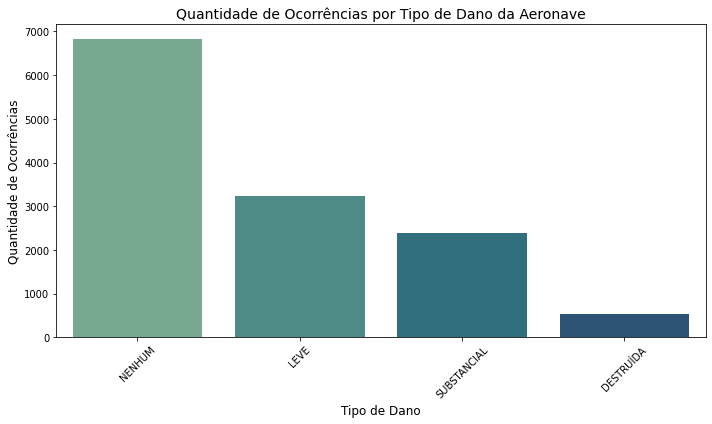

In [0]:
# Substitui '***' por 'NENHUM'
aeronave_df_tratado = aeronave_df_rename.withColumn(
    "aeronave_nivel_dano_tratado",
    F.when(F.col("aeronave_nivel_dano") == "***", "NENHUM")
     .otherwise(F.col("aeronave_nivel_dano"))
)

# Conta a quantidade de ocorrências de cada tipo de dano
dano_count_df = aeronave_df_tratado.groupBy("aeronave_nivel_dano_tratado").count()

# Converte para Pandas
dano_count_pd = dano_count_df.toPandas()

# Remove valores nulos
dano_count_pd = dano_count_pd.dropna(subset=["aeronave_nivel_dano_tratado"])

# Ordena para melhor visualização (opcional)
dano_count_pd = dano_count_pd.sort_values("count", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x="aeronave_nivel_dano_tratado",
    y="count",
    data=dano_count_pd,
    palette="crest"
)

plt.title("Quantidade de Ocorrências por Tipo de Dano da Aeronave", fontsize=14)
plt.xlabel("Tipo de Dano", fontsize=12)
plt.ylabel("Quantidade de Ocorrências", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3) Quais os mesês que ocorreram mais acidentes? 

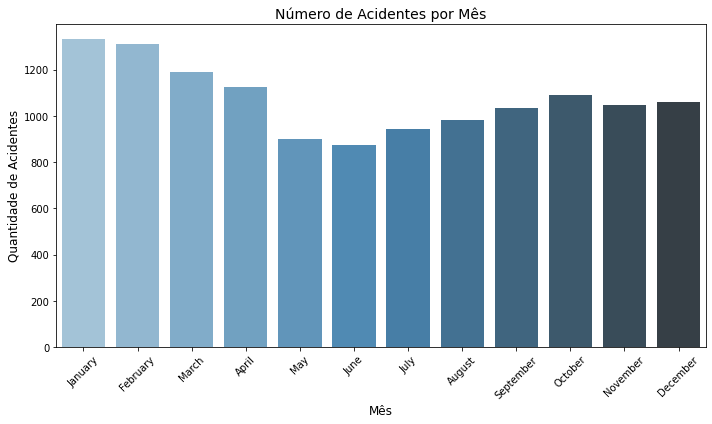

In [0]:
ocorrencia_df_data = ocorrencia_df_rename_recomendacao.withColumn(
    "data_ocorrencia", to_date(col("ocorrencia_dia"), "yyyy-MM-dd")
)

# 2. Extrai o mês da data
ocorrencia_df_mes = ocorrencia_df_data.withColumn("mes", month(col("data_ocorrencia")))

# 3. Conta as ocorrências por mês
ocorrencias_por_mes = ocorrencia_df_mes.groupBy("mes").count()

# 4. Converte para Pandas
ocorrencias_por_mes_pd = ocorrencias_por_mes.toPandas().sort_values("mes")

# 5. Mapeia o número do mês para nome (opcional, pra deixar bonito)
import calendar
ocorrencias_por_mes_pd["mes_nome"] = ocorrencias_por_mes_pd["mes"].apply(lambda x: calendar.month_name[x])

# 6. Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    x="mes_nome",
    y="count",
    data=ocorrencias_por_mes_pd,
    palette="Blues_d"
)

plt.title("Número de Acidentes por Mês", fontsize=14)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Quantidade de Acidentes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4)Quantas investigações ainda estão ativas?

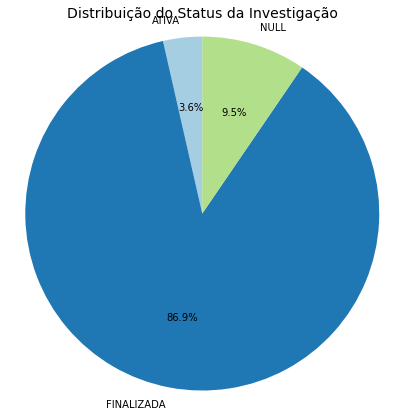

In [0]:
status_df = ocorrencia_df_rename_recomendacao.groupBy("investigacao_status").count()

# 2. Converte para pandas
status_pd = status_df.toPandas()

# 3. Remove status nulos (opcional)
status_pd = status_pd.dropna(subset=["investigacao_status"])

# 4. Gráfico de pizza
plt.figure(figsize=(7, 7))
plt.pie(
    status_pd["count"],
    labels=status_pd["investigacao_status"],
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Paired.colors
)
plt.title("Distribuição do Status da Investigação", fontsize=14)
plt.axis("equal")  # Deixa o gráfico em forma de círculo
plt.show()

### 5) Quais estados que ocorrem mais acidentes?

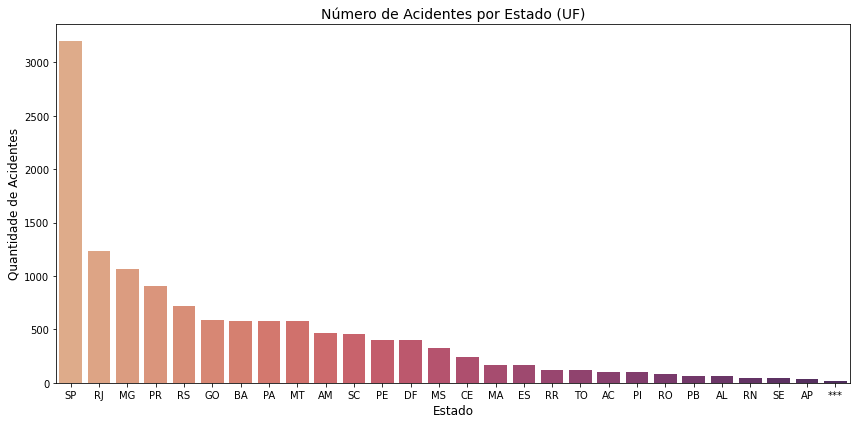

In [0]:
# 1. Conta os acidentes por estado (UF)
ocorrencias_por_estado_df = ocorrencia_df_rename_recomendacao.groupBy("ocorrencia_uf").count()

# 2. Converte para Pandas
ocorrencias_por_estado_pd = ocorrencias_por_estado_df.toPandas()

# 3. Remove nulos (opcional)
ocorrencias_por_estado_pd = ocorrencias_por_estado_pd.dropna(subset=["ocorrencia_uf"])

# 4. Ordena decrescente
ocorrencias_por_estado_pd = ocorrencias_por_estado_pd.sort_values("count", ascending=False)

# 5. Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x="ocorrencia_uf",
    y="count",
    data=ocorrencias_por_estado_pd,
    palette="flare"
)

plt.title("Número de Acidentes por Estado (UF)", fontsize=14)
plt.xlabel("Estado", fontsize=12)
plt.ylabel("Quantidade de Acidentes", fontsize=12)
plt.tight_layout()
plt.show()

## Fechando Spark

In [0]:
spark.stop()